<a href="https://colab.research.google.com/github/whorseman/Assignments/blob/main/learningportfolio_Gluonts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gluonts==0.12.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.8 MB/s eta 0:00:00


In [17]:
data  = pd.read_csv("/content/drive/MyDrive/DIGO/BTC-USD-2.csv",index_col=0)
data['item_id'] = 'BTC'

In [16]:
url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col=0, parse_)
df.head()

,target,item_id
2021-01-01 00:00:00,-1.3378,A
2021-01-01 01:00:00,-1.6111,A
2021-01-01 02:00:00,-1.9259,A
2021-01-01 03:00:00,-1.9184,A
2021-01-01 04:00:00,-1.9168,A


In [ ]:
data.rename(columns={'Date': 'timestamp'})

In [18]:
data.head

<bound method NDFrame.head of                     Open          High           Low         Close  \
Date                                                                 
2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500   
2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750   
2022-01-03  47343.542969  47510.726563  45835.964844  46458.117188   
2022-01-04  46458.851563  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
...                  ...           ...           ...           ...   
2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828   
2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266   
2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797   
2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938   
2022-12-31  16603.673828  16628.986328  16517.519531  16547.496094   

               Adj Close       Volume item_id  
Date       

In [19]:
from gluonts.dataset.pandas import PandasDataset

ds = PandasDataset.from_long_dataframe(data, target="Open", item_id='item_id')

In [ ]:
from gluonts.dataset.util import to_pandas


def highlight_entry(entry, color):
    start = entry["start"]
    end = entry["start"] + len(entry["target"])
    plt.axvspan(start, end, facecolor=color, alpha=0.2)


def plot_dataset_splitting(original_dataset, training_dataset, test_pairs):
    for original_entry, train_entry in zip(original_dataset, training_dataset):
        to_pandas(original_entry).plot()
        highlight_entry(train_entry, "red")
        plt.legend(["sub dataset", "training dataset"], loc="upper left")
        plt.show()

    for original_entry in original_dataset:
        for test_input, test_label in test_pairs:
            to_pandas(original_entry).plot()
            highlight_entry(test_input, "green")
            highlight_entry(test_label, "blue")
            plt.legend(["sub dataset", "test input", "test label"], loc="upper left")
            plt.show()

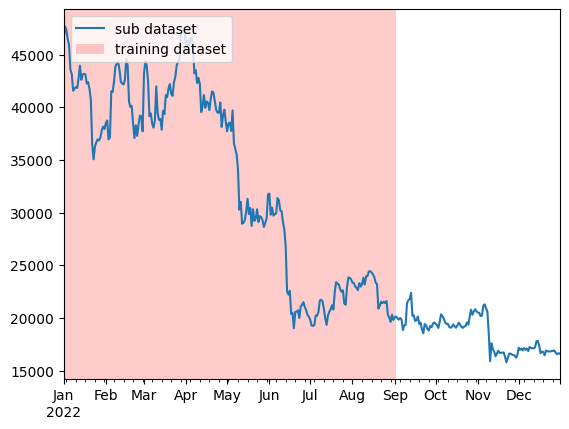

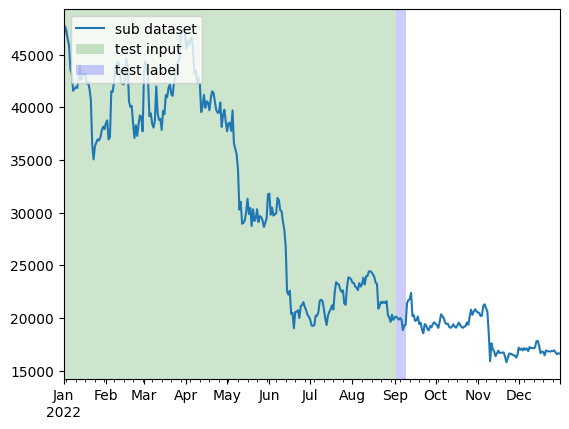

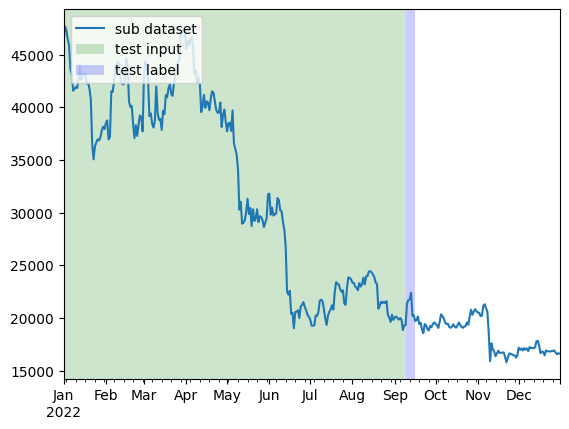

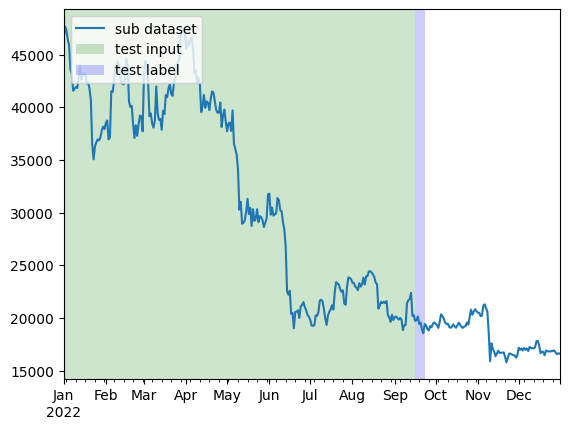

In [ ]:
from gluonts.dataset.split import split

prediction_length = 7
training_dataset, test_template = split(
    ds, date=pd.Period("2022-09-01 00:00:00", freq="1D")
)
test_pairs = test_template.generate_instances(
    prediction_length=prediction_length,
    windows=3,
)

plot_dataset_splitting(ds, training_dataset, test_pairs)

In [ ]:
!pip install "gluonts[mxnet]"

In [ ]:
from gluonts.mx import DeepAREstimator, Trainer

estimator = DeepAREstimator(
    freq=ds.freq, prediction_length=24, trainer=Trainer(epochs=1)
)
predictor = estimator.train(ds)
predictions = predictor.predict(ds)

100%|██████████| 50/50 [00:16<00:00,  3.09it/s, epoch=1/1, avg_epoch_loss=10.4]


In [ ]:
predictions

<generator object GluonPredictor.predict at 0x7fc3c99de880>